In [27]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

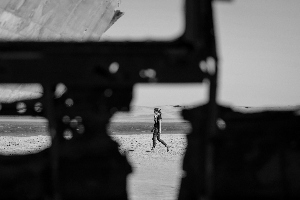

In [28]:
import cv2 as cv
img = cv.imread("/content/edited horse image.png")
# Resize the image to a specific width and height (e.g., 300x200)
img = cv.resize(gray_img, size,(300,200))
cv2_imshow(img)

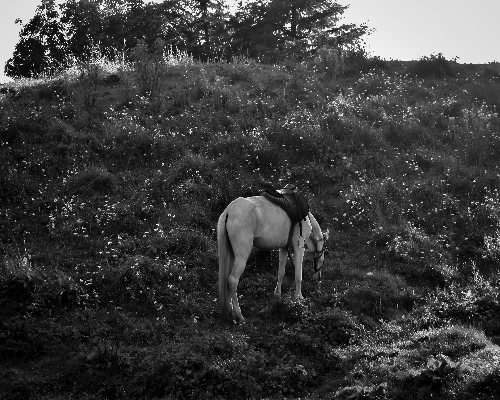

In [34]:

gray_img = cv.imread("/content/edited horse image.png",cv.IMREAD_GRAYSCALE)
gray_imgr = cv.resize(gray_img,(500,400))
cv2_imshow(gray_imgr)

In [35]:
cv.imwrite("horse.png", gray_img)

True

Edit Image

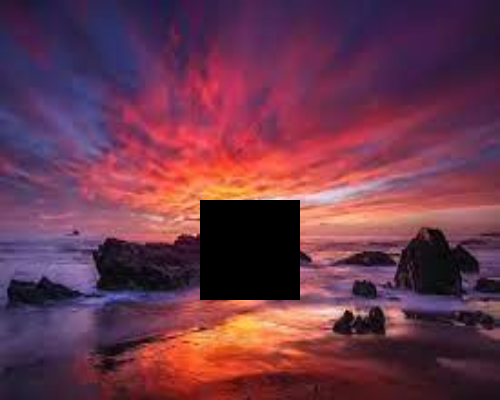

done


In [49]:
imgr = cv.imread("/content/download.jpeg")
img = cv.resize(imgr,(500,400))
img_copy = np.copy(img)
img_copy[200:300, 200:300, :] = 0 #
cv2_imshow(img_copy)
print('done')

Read and Write Image

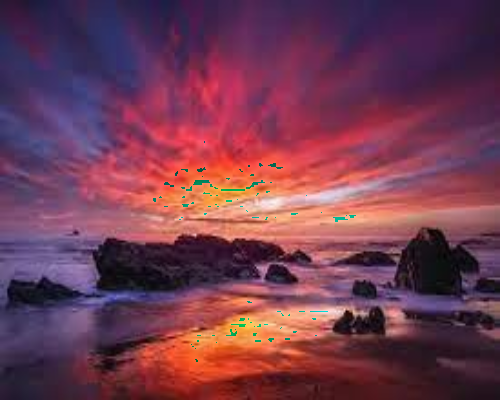

In [53]:
h, w, ch = img.shape
for row in range(h):
  for col in range(w):
    b, g, r = img[row, col]
    b = 255 - b
    g = 255 - g
    r = 255 - r
    img[row, col] = [b, g, r]

cv2_imshow(img)


Merge Two imges

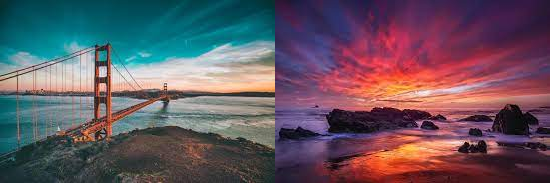

In [54]:
img1 = cv.imread("/content/download (1).jpeg")
img2 = cv.imread("/content/download.jpeg")
merge_image = np.hstack((img1, img2))
cv2_imshow(merge_image)


Create Black and White Picture


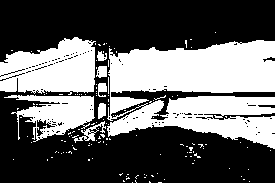

In [55]:
img = cv.imread("/content/download (1).jpeg", cv.IMREAD_GRAYSCALE)
means, stdDev = cv.meanStdDev(img)
img[np.where(img < means)] = 0
img[np.where(img > means)] = 255
cv2_imshow(img)

Normalization Picture Pixel

[[31. 31. 31. ... 31. 31. 31.]
 [32. 32. 32. ... 31. 31. 31.]
 [33. 33. 33. ... 31. 31. 31.]
 ...
 [35. 34. 34. ... 22. 22. 22.]
 [34. 33. 33. ... 21. 21. 21.]
 [33. 33. 32. ... 21. 21. 21.]]


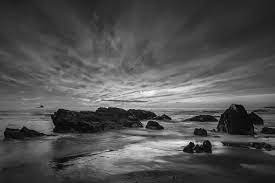

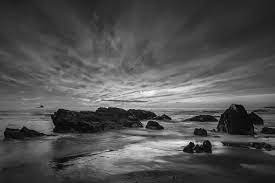

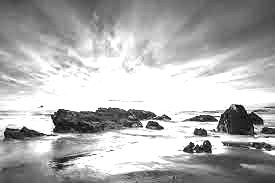

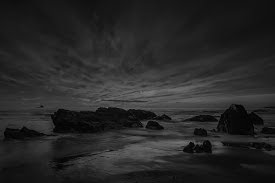

In [56]:

img = cv.imread("/content/download.jpeg")
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_img = np.float32(gray_img)
print(gray_img)

## MinMax Normalization
dst = np.zeros(gray_img.shape, dtype=np.float32)
cv.normalize(gray_img, dst=dst, alpha=0, beta=1.0, norm_type=cv.NORM_MINMAX)
cv2_imshow(np.uint(dst*255))

## Norm Inf Normalization
dst = np.zeros(gray_img.shape, dtype=np.float32)
cv.normalize(gray_img, dst=dst, alpha=1.0, beta=0, norm_type=cv.NORM_INF)
cv2_imshow(np.uint(dst*255))

## Norm L1 Normalization
dst = np.zeros(gray_img.shape, dtype=np.float32)
cv.normalize(gray_img, dst=dst, alpha=1.0, beta=0, norm_type=cv.NORM_L1)
cv2_imshow(np.uint(dst*10000000))

## Norm L2 Normalization
dst = np.zeros(gray_img.shape, dtype=np.float32)
cv.normalize(gray_img, dst=dst, alpha=1.0, beta=0, norm_type=cv.NORM_L2)
cv2_imshow(np.uint(dst*10000))


Image Flip


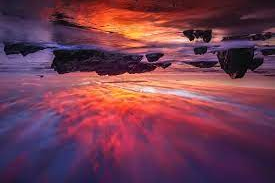

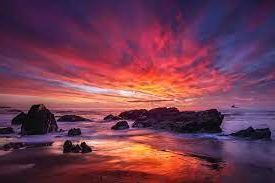

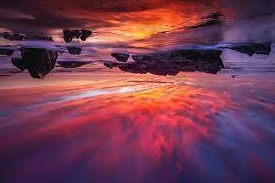

In [59]:
img = cv.imread("/content/download.jpeg")
# X-Flip 0
dst1 = cv.flip(img, 0)
cv2_imshow(dst1)

# Y-Flip 1
dst1 = cv.flip(img, 1)
cv2_imshow(dst1)

# XY-Flip -1
dst1 = cv.flip(img, -1)
cv2_imshow(dst1)


Draw Geometry


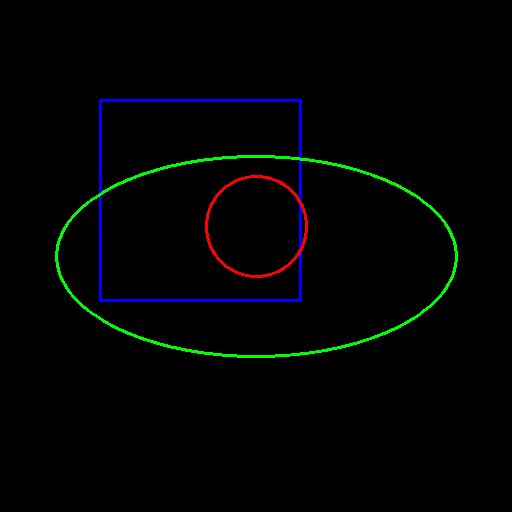

In [62]:
img = np.zeros((512, 512, 3),dtype=np.uint8)
cv.rectangle(img, (100,100),(300,300),(255,0,0),2,cv.LINE_8,0)
cv.circle(img, (256,226),50,(0,0,255),2, cv.LINE_8,0)
cv.ellipse(img, (256,256),(200,100),360,0,360,(0,255,0),2,cv.LINE_8,0)
cv2_imshow(img)



Geometric


Thresholding

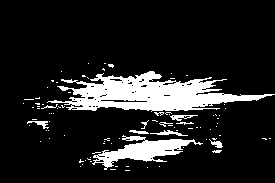

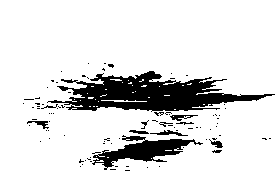

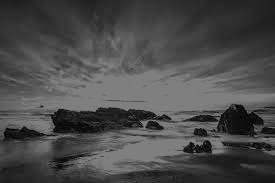

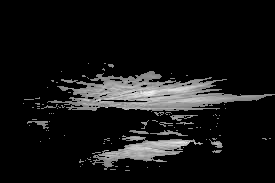

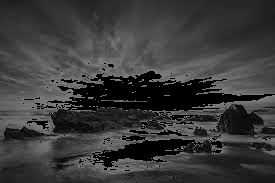

In [64]:
img = cv.imread("/content/download.jpeg")
th = 127
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
for i in range(5):
  ret, binary = cv.threshold(img_gray, th, 255, i)
  cv2_imshow(binary)


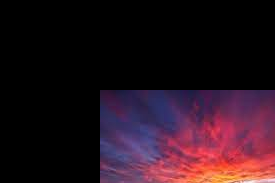

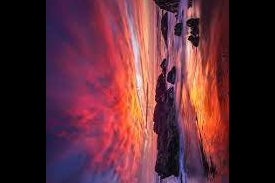

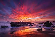

In [80]:
 # Shifting
img = cv.imread("/content/download.jpeg")
rows = img.shape[0]
cols = img.shape[1]
M =np.float32([[1,0,100], [0,1,90]])
shifted = cv.warpAffine(img, M, (cols, rows))
cv2_imshow(shifted)

# rotation

rows = img.shape[0]
cols = img.shape[1]
M = cv.getRotationMatrix2D((cols/2, rows/2),90,1)
rotation = cv.warpAffine(img, M, (cols, rows))
cv2_imshow(rotation)
# scaling

img = cv.resize(img, None, fx=0.2, fy=0.2, interpolation=cv.INTER_CUBIC)
cv2_imshow(img)





Bilateral Filter


ROI(Region of Interest)


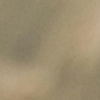

In [69]:
img = cv.imread("/content/neom-sXwssebYacc-unsplash.jpg")
h, w = img.shape[:2]
roi = img[100:200, 200:300, :]
cv2_imshow(roi)

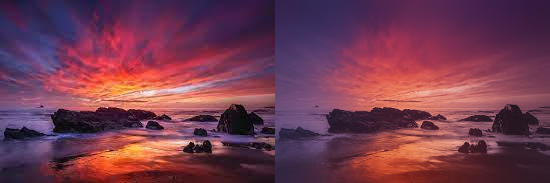

In [82]:
img = cv.imread("/content/download.jpeg")
dst = cv.bilateralFilter(img, 0, 100, 30)
h, w = img.shape[:2]
result = np.zeros([h, w*2, 3], dtype=img.dtype)
result[0:h, 0:w, :] = img
result[0:h, w:2*w, :] = dst
cv2_imshow(result)


Edge Filtering


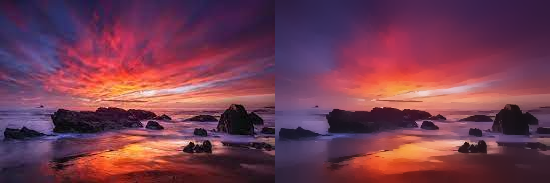

In [71]:
img = cv.imread("/content/download.jpeg")
dst = cv.edgePreservingFilter(img, sigma_s=50, sigma_r=0.4, flags=cv.RECURS_FILTER)
h, w = img.shape[:2]
result = np.zeros([h, w*2, 3], dtype=img.dtype)
result[0:h, 0:w, :] = img
result[0:h, w:2*w, :] = dst
cv2_imshow(result)

Sobel Filter


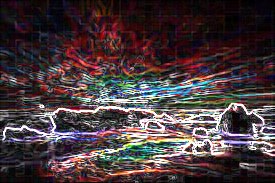

In [72]:
img = cv.imread("/content/download.jpeg")
h, w = img.shape[:2]
x_grade = cv.Sobel(img, cv.CV_32F, 1, 0)
y_grade = cv.Sobel(img, cv.CV_32F, 0, 1)
x_grade = cv.convertScaleAbs(x_grade)
y_grade = cv.convertScaleAbs(y_grade)
dst =cv.add(x_grade, y_grade, dtype=cv.CV_16S)
dst = cv.convertScaleAbs(dst)
cv2_imshow(dst)

Canny Edge Detection


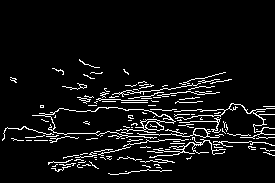

In [73]:
img = cv.imread("/content/download.jpeg")
dst = cv.Canny(img, 150, 250)
cv2_imshow(dst)

Gaussian Blur

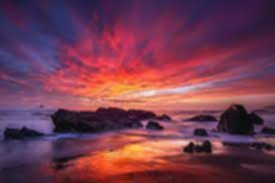

In [79]:

img = cv.imread("/content/download.jpeg")
dst = cv.GaussianBlur(img, (3,3), 5)
cv2_imshow(dst)